### Ep0 | Seaborn库的介绍
Seaborn是基于Python的一个非常受欢迎的图形可视化库，它在Matplotlib的基础上对其进行了更高级的封装，使得作图更加方便快捷。Seaborn可以实现Python环境下的绝大部分探索性分析的任务，而且对Python的其他库（比如 Numpy/Pandas/Scipy）有很好的支持。

Seaborn库的应用：机器学习-探索性数据分析-数据可视化

#### 函数结构
##### 图绘制函数 figure-level functions
变量分布 displot (distribution plot)  
双变量 relplot (relation plot)  
线性关系 lmplot (linear model plot)  
类别变量分析 catplot (categorical plot)  
##### 轴绘制函数 axes-level functions
变量分布 histplot/kdeplot/ecdfplot/rugplot  
双变量 scatterplot/lineplot  
线性关系 regplot/residplot  
类别变量分析 countplot/barplot/pointplot/boxplot/stripplot/swarmplot/violinplot  
（一些轴绘制函数可以用对应的图绘制函数+参数实现）

### Ep1 | seaborn库的安装与基本操作
在终端（cmd）安装核心库 Seaborn 和 Matplotlib。  
pip install seaborn 或 conda install seaborn  
常用缩写seaborn=sns, matplotlib.pyplot=plt，这里为了方便展示，都是使用的全称

In [ ]:
import seaborn # as sns
import matplotlib.pyplot # as plt
%matplot inline	#jupyter notebook

In [ ]:
print(seaborn.__version__)  # 版本检查
# 检查版本与更新: pip install --upgrade seaborn

#### 查看seaborn自带的数据集
seaborn内置了一些数据集以供测试与学习使用，使用get_dataset_names()可以获取这些数据集的名称，通过load_dataset()可以加载这些数据集。  
这些数据集存放在在线存储库中（网址：https://github.com/mwaskom/seaborn-data），如果代码运行失败的话可能需要一点魔法上网。

In [ ]:
print(seaborn.get_dataset_names())

In [ ]:
penguin_df=seaborn.load_dataset("penguins")
penguin_df  #导入数据集penguins

In [ ]:
# 查看数据集随机的十条数据，对数据有一个初步的印象
penguin_df.sample(10)

load_dataset包含有三个参数：  
seaborn.load_dataset('name',data_home='str',cache=True)  
name: str，代表数据集名字；  
cache: boolean，当为True时，从本地加载数据，反之则从网上下载；  
data_home: string，代表本地数据的路径  
如果要加载自己的数据集，需要使用pandas库的read_csv()方法

In [ ]:
# 加载本地数据
import pandas

uplist_df = pandas.read_csv('uplist.csv')
uplist_df

### Ep2 | 变量分布分析 displot/relplot
通过数据可视化来完成的目标可以分成两种：对变量的分析和对变量间关系的分析。首先介绍变量分布的分析方法。对于导入的数据集信息，通过直方图和散点图等可视化方式对变量分布进行直观的展示。

In [ ]:
# 导入numpy库可以方便地对数据进行分析
import numpy

In [ ]:
# 查看变量的最大值和最小值
print(numpy.min(penguin_df["bill_length_mm"]))
print(numpy.max(penguin_df["bill_length_mm"]))

##### seaborn.boxplot()箱式图：查看数值变量的取值范围，分析是否有异常值
seaborn.boxplot(data,x)  
data=数据集，x=选择的变量名称(string)

In [ ]:
seaborn.boxplot(data=penguin_df,x="bill_length_mm")

In [ ]:
tip_df=seaborn.load_dataset("tips")
seaborn.boxplot(data=tip_df)    #标注出的数据为可能存在异常的值

##### seaborn.displot()直方图：查看变量的分布情况
seaborn.displot(data,x,[bins],[shrink])  
data=数据集，x=变量名称，bins为区间长度限制(int)，shrink可以控制柱状图显示的宽度

In [ ]:
# 直方图：查看变量的分布
seaborn.displot(data=penguin_df,x="bill_length_mm",bins=10,shrink=1.0)

与图绘制函数displot()对应的是histplot()方法，同样可以生成类似的直方图，不过图形的长宽比有一些变化

In [ ]:
seaborn.histplot(data=penguin_df,x="bill_length_mm",bins=10,shrink=1.0) 

使用seaborn.countplot()可以对类别进行分析，在displot()方法中，通过参数hue可以为变量划分不同的类别

In [ ]:
seaborn.countplot(data=penguin_df,x="species")

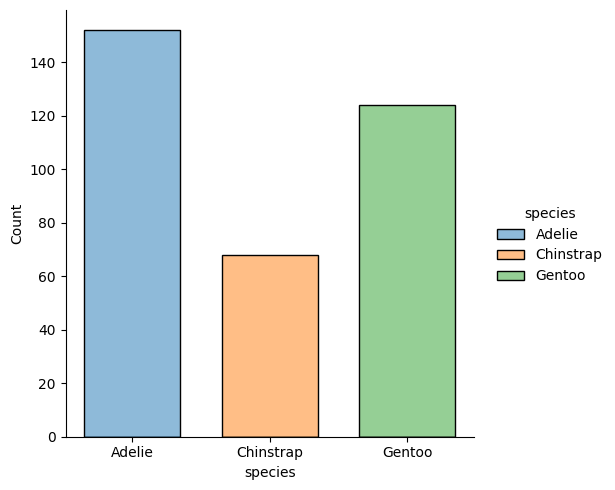

In [94]:
seaborn.displot(data=penguin_df,x="species",hue="species",shrink=0.7)

##### seaborn.kdeplot():实现kde拟合曲线分析
在displot()中，通过参数kind="kde"来将直方图调整为kde曲线，或者使用对应的轴绘制函数kdeplot()来实现

In [ ]:
seaborn.displot(x="bill_length_mm",data=penguin_df,kind="kde")

In [ ]:
seaborn.kdeplot(x="bill_length_mm",data=penguin_df)

在使用kde曲线进行拟合时，有时超出取值范围的部分拟合值并未归零。对于拟合数据超出取值范围的部分，可以通过如下方法处理：

In [ ]:
seaborn.displot(x="bill_length_mm",data=penguin_df,kind="kde",cut=0)    #隐藏取值范围外的部分

也可以先用displot()绘制一个直方图，再使用参数kde=True在直方图上叠加kde曲线

In [ ]:
seaborn.displot(x="bill_length_mm",data=penguin_df,kde=True)    #kde=True在直方图上叠加kde曲线

##### seaborn.rugplot变量分布
这是一个叠加在其他displot上的方法，通过参数rug=True实现，没有单独的函数

In [ ]:
seaborn.displot(x="bill_length_mm",data=penguin_df,kind="kde",rug=True) #在kde曲线上叠加rugplot

##### 通过按种类筛选分析双峰分布
通过上述可视化分析能够看出，该变量呈现类似双峰分布的效果。添加hue参数按种类筛选，可以进一步分析双峰分布产生的原因

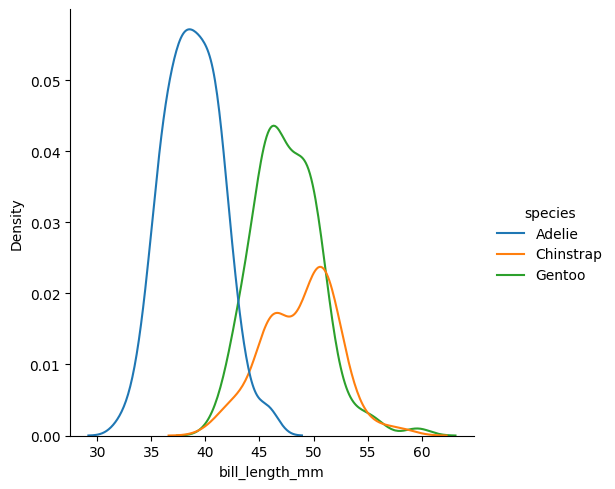

In [92]:
seaborn.displot(x="bill_length_mm",data=penguin_df,kind="kde",hue="species") #按种类分析(筛选)

##### 分析数据集带偏移的情况
在数据量较大的时候，数据可能带有一定偏移，此时需要注意分析数据集的偏移情况  
这里选择seaborn库自带的diamonds数据集，对其中的price进行分析：

In [ ]:
dia_df=seaborn.load_dataset("diamonds") #该数据集较大
dia_df

首先可以通过箱型图分析可知该数据可能带有偏移，再用直方图展示，可以看出数据的偏移情况。添加log_scale参数，可以换用对数坐标轴展示

In [ ]:
#分析数据带偏移的情况
seaborn.boxplot(data=dia_df,x="price")  #通过箱型图分析可知该数据可能带有偏移
seaborn.displot(data=dia_df,x="price")  #通过直方图可以看出数据的便宜情况
seaborn.displot(data=dia_df,x="price",log_scale=True)   #采用对数规模展示

##### 比较训练集和测试集的变量分布是否一致
在划分测试集时，有时数据可能会与训练集出现较大偏差，使用kde曲线可以比较训练集和测试级变量分布是否一致

In [ ]:
#对训练集进行划分，划分出30%的测试集
from sklearn.model_selection import train_test_split
train_df,test_df = train_test_split(dia_df,test_size=0.3,random_state=42)

In [ ]:
#对比depth变量的分布，先画出训练集kde曲线的图
seaborn.displot(data=train_df,x="depth",kind="kde",linewidth=5.0,color="r")

In [ ]:
#将测试集的图叠加到上一张图上，此时只能用kdeplot，否则会画出两张图
seaborn.displot(data=train_df,x="depth",kind="kde",linewidth=5.0,color="r")
seaborn.kdeplot(data=test_df,x="depth",color="g")

##### seaborn.ecdfplot():ecdf曲线（经验累积分布函数）
经验累积分布函数（ECDF）是一种用于可视化数据分布的统计工具。它表示给定数据集中小于或等于给定值的观测值的累积百分比。ECDF 是一种非参数化的描述统计方法，不对数据分布进行假设，而是直接利用观测到的数据点。  

具体而言，对于给定的数据集，ECDF 的计算步骤如下：  
对数据集中的每个观测值，确定小于或等于该值的观测值的数量。
将这个数量除以数据集的总观测值数量，得到累积分布的百分比。
ECDF 图是由数据集中的每个唯一值及其对应的累积百分比组成的曲线图。该图可用于直观地观察数据的分布情况，包括中位数、分位数和数据的离散程度。

In [ ]:
seaborn.displot(penguin_df,x="bill_length_mm",kind="ecdf")

##### seaborn.relplot()绘制散点图
seaborn.relplot(data,x,y,[hue],[style],[markers])
选择xy轴变量，hue参数可以为变量进行分类，也可以通过markers来自定义不同分类的图标展示

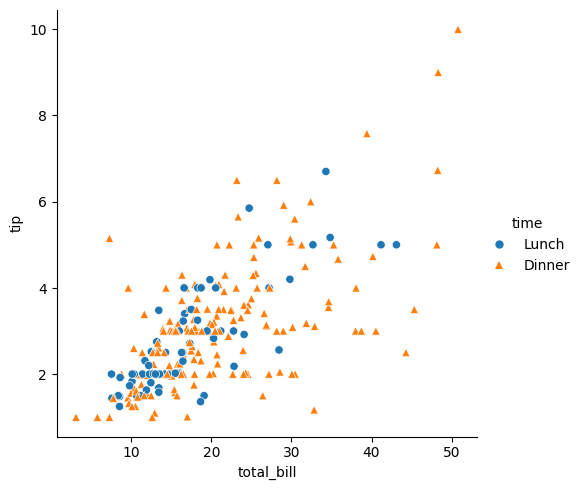

In [91]:
seaborn.relplot(data=tip_df,x="total_bill",y="tip",hue="time",style="time",markers=["o","^"])

当选择的分类是一组连续的数据时（比如下面的size=1,2,3,4,5,6），hue会采用渐变色来分类，可以通过size参数来改变不同分类的散点大小

In [ ]:
seaborn.relplot(data=tip_df,x="total_bill",y="tip",hue="size",size="size")

##### seaborn.lineplot()折线图(常用于股价数据等)
将散点图的数据连接起来表示成折线图，用于展示数据在一定时间内的变化过程

In [ ]:
stock_df=pandas.DataFrame(dict(time=numpy.arange(500),price=numpy.random.randn(500).cumsum()+numpy.ones(500)*50))   #模拟一组股价数据
seaborn.relplot(data=stock_df,x="time",y="price",kind="line")

##### FacetGrid（多图网格）特性：
将行和列设置为类别变量，根据不同类别将数据集划分为子集，在不同的子集上分析需要的变量分布（相当于绘制了变量的条件概率分布）

In [ ]:
seaborn.displot(penguin_df,x="bill_length_mm",row="sex",col="island",hue="species",kind="kde")

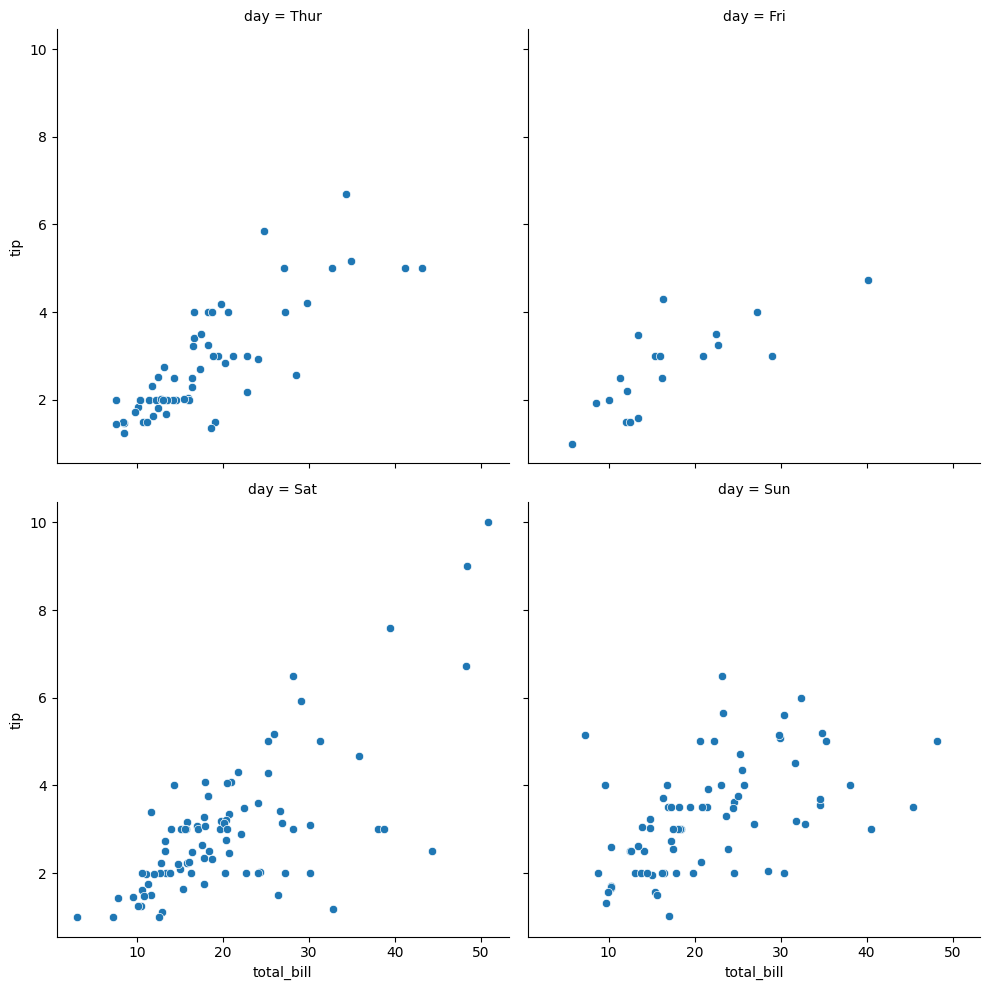

In [90]:
seaborn.relplot(data=tip_df,x="total_bill",y="tip",col="day",col_wrap=2)

### Ep3 | 变量关系分析 lmplot/displot

##### seaborn.lmplot()回归拟合：分析两个数值变量的线性关系
对应的轴绘制函数regplot()可以实现类似效果，使用residplot()可以在图像上叠加残差分布：

<Axes: xlabel='total_bill', ylabel='tip'>

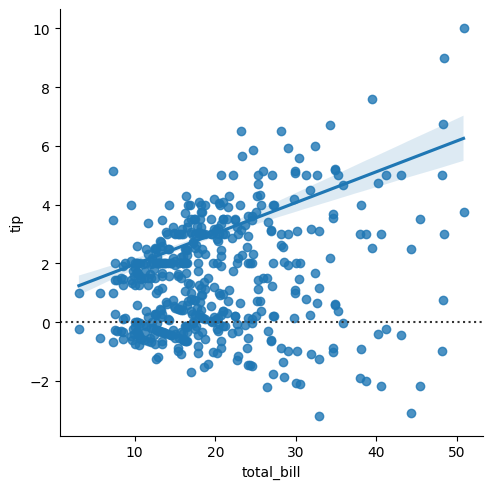

In [93]:
seaborn.lmplot(data=tip_df,x="total_bill",y="tip")  #regplot类似
seaborn.residplot(data=tip_df,x="total_bill",y="tip")   #残差分布

##### seaborn.displot()：绘制两个变量的联合分布情况
使用displot()可以分析两个变量的联合分布，在默认情况下采用的是直方图表示，可以通过kind="kde"调整为kde曲线，也可叠加rugplot等

In [ ]:
# 直方图联合分布
seaborn.displot(data=penguin_df,x="bill_length_mm",y="bill_depth_mm")

In [ ]:
# kde曲线联合分布+rugplot
seaborn.displot(data=penguin_df,x="bill_length_mm",y="bill_depth_mm",kind="kde",rug=True)

也可以直接使用kdeplot实现二元的kde图像，使用shade和cbar可以添加颜色棒，通过thresh参数和levels可以调整kde图像的层级疏密情况

In [ ]:
seaborn.kdeplot(data=penguin_df,x="bill_length_mm",y="bill_depth_mm",shade=True,cbar=True)

In [ ]:
seaborn.displot(data=penguin_df,x="bill_length_mm",y="bill_depth_mm",kind="kde",thresh=0.2,levels=5)

In [ ]:
seaborn.displot(data=dia_df,x="price",y="clarity",log_scale=[True,False])   #对数坐标

In [ ]:
seaborn.displot(data=penguin_df,x="island",y="species")     #种类关系分析

##### FaceGrid特性

In [ ]:
seaborn.lmplot(data=tip_df,x="total_bill",y="tip",row="smoker",col="time",hue="time")

##### seaborn.joinplot()：绘制两个变量的联合分布和各自分布(边缘分布)
通过kind参数可以指定联合分布和边缘分布的表示形式：  
kind:{"scatter","kde","hist","hex","reg","resid"}

In [ ]:
seaborn.jointplot(data=tip_df,x="total_bill",y="tip",kind="hex")

##### joinplot的升级版JointGrid(自定义)
joinplot已经预设了联合分布和各自分布的表示形式，如果要分别自定义联合分布和边缘分布，可以使用JointGrid来进行自定义：  
新建一个JointGrid“画布”，通过plot(联合分布,边缘分布)来进行自定义。如果想要对两者进行详细的设定，可以用plot_joint,plot_marginals对其单独进行自定义。

In [ ]:
g=seaborn.JointGrid(data=tip_df,x="total_bill",y="tip")
g.plot(seaborn.histplot,seaborn.boxplot)    #对JoinGrid进行自定义

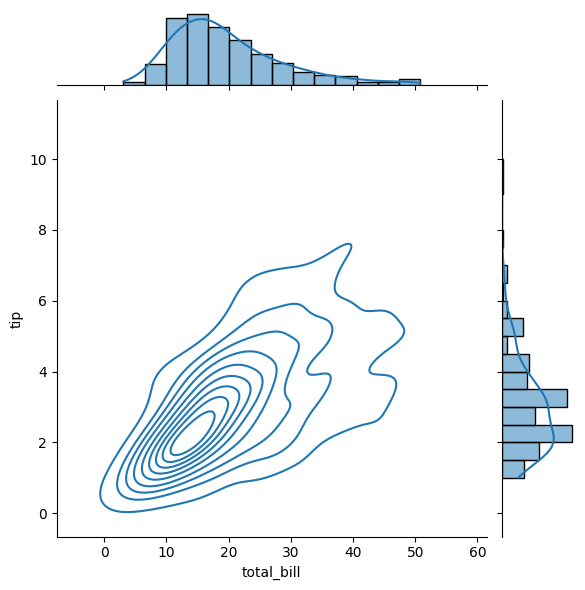

In [95]:
#分别自定义联合分布和边缘分布的详细设置
g=seaborn.JointGrid(data=tip_df,x="total_bill",y="tip")
g.plot_joint(seaborn.kdeplot)
g.plot_marginals(seaborn.histplot,kde=True)

##### seaborn.pairplot()成对地绘制所有数值变量的联合分布
通过pairplot成对绘制所有数值变量的联合分布，可以分析不同变量之间的相关性。同样使用kind参数来控制可视化的种类：kind:{"scatter","kde","hist","reg"}  
导入seaborn预设中的car_crashes数据集，探究导致车祸的哪些因素之间存在相关关系：

In [ ]:
car_df=seaborn.load_dataset("car_crashes")
car_df

In [ ]:
seaborn.pairplot(data=car_df,kind="reg")

如果只想研究部分变量来分析相关关系，则可以限定横纵轴的变量选择：

In [ ]:
seaborn.pairplot(data=car_df,kind="reg",x_vars=["speeding","alcohol"],y_vars=["total"]) #部分

##### pairplot升级版PairGrid，通过g.map()自定义绘制函数
类似的，pairplot也有对应的可自定义方法PairGrid。通过PairGrid方法可以自定义表格上三角，下三角以及对角线上的可视化种类

In [ ]:
g=seaborn.PairGrid(data=car_df,x_vars=["total","speeding","alcohol"],y_vars=["total","speeding","alcohol"])
g.map_upper(seaborn.scatterplot)    #上三角
g.map_diag(seaborn.histplot,kde=True)   #对角线
g.map_lower(seaborn.regplot)    #下三角

##### seaborn.heatmap()热力图：成对地绘制所有数值变量的相关系数
先通过corr求得每一对数值变量的相关系数，再用heatmap()方法将其转换为热力图展示。  
注意：corr方法需要排除数据类型为char的变量，添加numeric_only=True这一参数令其忽略不合要求的变量

In [ ]:
car_cor=car_df.corr(method='pearson',numeric_only=True)   #求每一对数值变量的相关系数
car_cor

seaborn.heatmap(corr,cmap,annot,fmt,linewidth)  
cmap调整颜色预设，annot=True可以在热力图上添加数值，fmt限定小数位数，linewidth调整描边宽度，使图像更加美观

In [ ]:
seaborn.heatmap(car_cor,cmap="Blues",annot=True,fmt=".2f",linewidth=0.5)

### Ep4 | 类别变量分析 catplot

##### 类别变量的分布：seaborn.countplot(),seaborn.histplot()

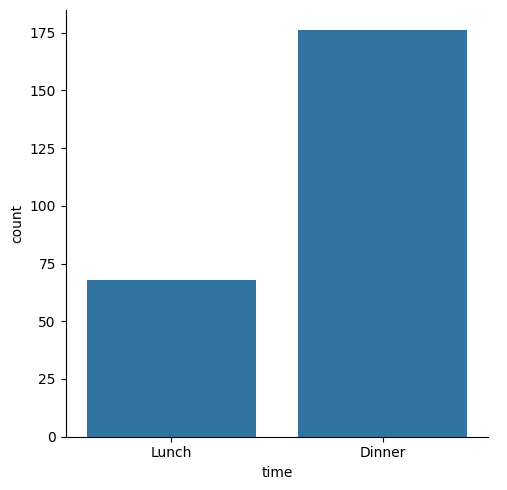

In [96]:
seaborn.catplot(data=tip_df,x="time",kind="count")

#### 类别变量与数值变量的关系

##### 不同类别中数值变量的均值/中值估计: barplot,pointplot

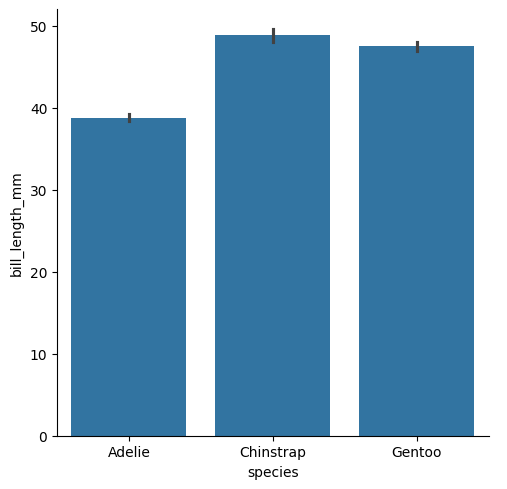

In [97]:
seaborn.catplot(data=penguin_df,x="species",y="bill_length_mm",kind="bar")

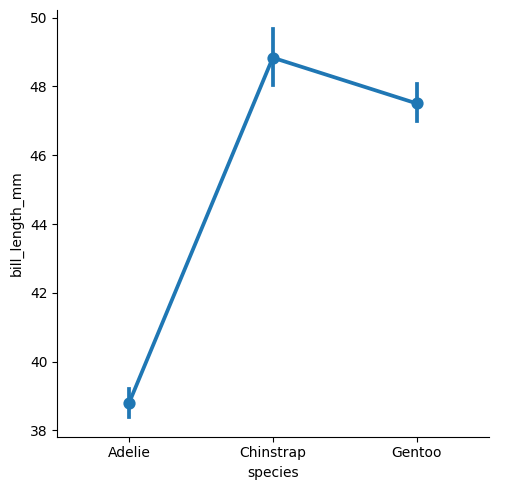

In [98]:
seaborn.catplot(data=penguin_df,x="species",y="bill_length_mm",kind="point")

In [ ]:
#FacetGrid特性
seaborn.catplot(data=tip_df,x="time",y="tip",kind="bar",col="size",col_wrap=3)

##### 不同类别中数值变量的取值范围：boxplot,boxenplot

In [ ]:
seaborn.catplot(data=penguin_df,x="species",y="bill_length_mm",kind="box")

In [ ]:
#boxenplot用于数据量较大的时候，可以进行分层表示
seaborn.catplot(data=dia_df,x="clarity",y="price",kind="boxen")

##### 不同类别中数值变量的分布图：stripplot,swarmplot,violinplot

In [ ]:
seaborn.catplot(data=penguin_df,x="species",y="bill_length_mm",kind="strip",jitter=0.2) #带状图

In [ ]:
seaborn.catplot(data=penguin_df,x="species",y="bill_length_mm",kind="swarm") #蜂群图

In [ ]:
seaborn.catplot(data=penguin_df,x="species",y="bill_length_mm",kind="violin") #小提琴图

小提琴图可以添加hue分类，利用split=True可以实现下面的效果，还是看图更直观一些

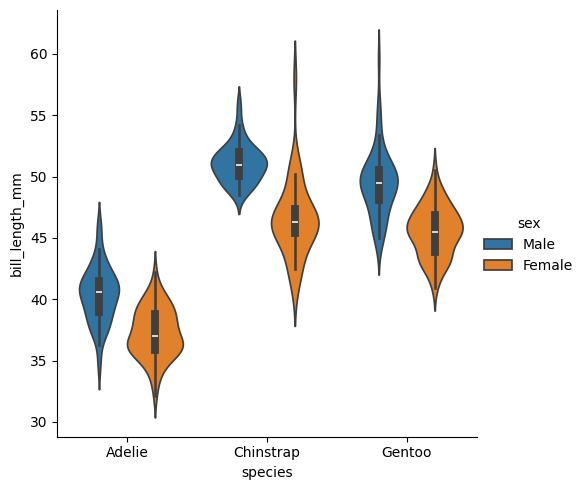

In [101]:
seaborn.catplot(data=penguin_df,x="species",y="bill_length_mm",kind="violin",hue="sex")

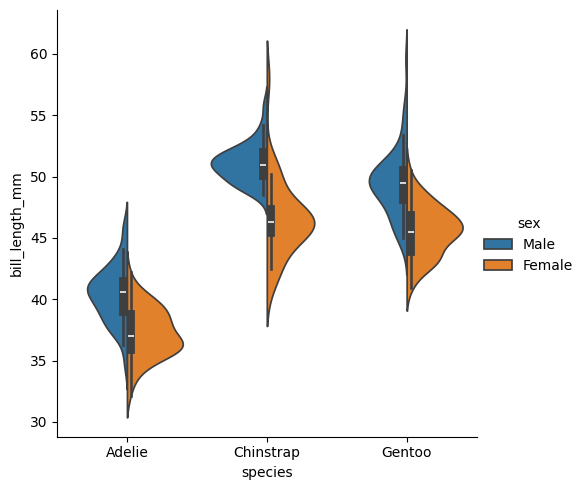

In [100]:
seaborn.catplot(data=penguin_df,x="species",y="bill_length_mm",kind="violin",hue="sex",split=True)

轴绘制函数可以进行叠加，比如将蜂群图叠加到小提琴图上，密恐警告...

In [ ]:
seaborn.catplot(data=penguin_df,x="species",y="bill_length_mm",kind="violin")
seaborn.swarmplot(data=penguin_df,x="species",y="bill_length_mm",color="w",size=3)

### Ep5 | 美化与自定义绘制函数 FacetGrid/PairGrid
上面的内容大多数都是seaborn已经预设好的可视化方案，当然我们也可以从“新建画布”开始，对可视化图像从头进行自定义，采用FacetGrid和PairGrid可以实现这一功能，在先前已经介绍了一部分特性，这里简单重复一遍：

In [ ]:
# FacetGrid实现
g=seaborn.FacetGrid(data=tip_df,row="time",col="smoker")
g.map(seaborn.scatterplot,"total_bill","tip")

In [ ]:
# PairGrid实现
g=seaborn.PairGrid(data=penguin_df,hue="species")
g.map_diag(seaborn.kdeplot)
g.map_offdiag(seaborn.scatterplot)

#### 图形背景的调整
Seaborn 中有 white / whitegrid / dark / darkgrid / ticks 几种样式，用 set_style() 函数控制，分别如下：  
whitegrid 白色网格背景  
white 白色背景（默认）  
darkgrid 黑色网格背景  
dark 黑色背景  
ticks 四周带有刻度的白色背景  

In [ ]:
#创建一个20行6列的数据
data = numpy.random.normal(size=(20, 6)) + numpy.arange(6) / 2
seaborn.boxplot(data=data)

In [ ]:
# 设为白色网格背景
seaborn.set_style("whitegrid")
seaborn.boxplot(data=data)

In [ ]:
# 设为黑色网格背景
seaborn.set_style("darkgrid")
seaborn.boxplot(data=data)

seaborn 中的分类色板，主要用 color_palette() 函数控制，color_palette() 不写参数则显示为 Seaborn 默认颜色。如果需要设置所有图形的颜色，则用 set_palette() 函数定义。  
Seaborn 中6个默认的颜色循环主题分别为： deep, muted, pastel, bright, dark, colorblind。

In [ ]:
# 设置颜色模式为'deep'
seaborn.boxplot(data=data,palette=seaborn.color_palette('deep'))

In [ ]:
# 设置颜色模式为'pastel'
seaborn.boxplot(data=data,palette=seaborn.color_palette('pastel'))

需要注意的是，除了默认的颜色模式有10中颜色外，其他的颜色模式只有6种颜色，如果需要更多颜色，那么则需要采用hls色彩空间。

In [ ]:
#创建一个20行10列的数据'data2'
data2 = numpy.random.normal(size=(20, 10)) + numpy.arange(10) / 2  

In [ ]:
#利用hls色彩空间进行调色
seaborn.boxplot(data=data2, palette=seaborn.color_palette('hls', 10))  

In [ ]:
#可以尝试 Reds/Greens，默认颜色由浅到深的渐变色
seaborn.boxplot(data=data,palette=seaborn.color_palette('Blues'))  

##### 处理中文的乱码问题
Seaborn 对中文的显示不太友好，如果在遇到乱码问题时，可以加入下面的代码：

In [ ]:
# 指定默认字体
matplotlib.rcParams['font.sans-serif'] = ['SimHei']

In [ ]:
# 解决保存图像是负号'-'显示为方块的问题 
matplotlib.rcParams['axes.unicode_minus'] = False

##### 导出seaborn画出的图形
画出的图形我们需要保存，可以先建立一个画布，设置我们图像的大小，然后将这个画布保存下来。

In [ ]:
#设置一个（12，6）的画布
matplotlib.pyplot.figure(figsize=(12, 6))

In [ ]:
#图形绘制代码
seaborn.boxplot(data=data,palette=seaborn.color_palette('Blues')) 

In [ ]:
#将画布保存为'output.png'，还可以保存为jpg、svg格式图片
matplotlib.pyplot.savefig('output.png')